DA Ducklings   /   Lal Ertun, Emmy Cai, Linh Trinh    /   April 13th 2025

# Sam’s Fans Campaign Restructuring    

Our data analysis aims to project the performance of both the Thread of Hope (ToH) Campaign (a unique one-time effort) and the recurring End of Year (EoY) Campaign. By examining 10 years of historical campaign data, we identified peak donation periods, successful tactics, and engagement trends—particularly the October surge driven by Thread of Hope (ToH), which consistently outperforms other campaigns. This raises two key questions:

1. What drives ToH’s success?
    + High donor retention, outsourced partnerships, and compelling messaging.
2. Can we replicate this success for EoY in Q4?
    + Yes, by adapting ToH’s strategies to the holiday season’s giving trends.

Our analysis serves a dual purpose:
+ Short-term: Optimize CDH using ToH’s proven methods.
+ Long-term: Restructure EoY into a high-performing annual campaign.

## Introduction    

After analysing the Fundraising data, we want to convey a projection of possible changes that can be taken on the annual Year-End Campaign and how to make it become a higher performing campaign. After cleaning the dataset and creating graphs to analyze the different trends in donation revenue and frequency of donors of all the existing campaigns over the past 10 years in the dataset, we were able to decipher the peak donation periods and tactics, and employ our research on methods of implementation for the improvement of the Year-End Campaign.

## Exploration of Sam's Fans Transactions Data

#### Setting up the Dataframe 

The dataset was loaded and preprocessed using Python libraries such as pandas, seaborn. Key steps included: converting dates to datetime format, extracting the year and month from the date, labeling the campaign type for each donation using campaign and appeals, creating a column to indicate the donor frequency for each campaign type through out the years.

In [20]:
# load & import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

transactions_sf = pd.read_excel('transactions.xlsx')
transactions_sf.head(5)

,Account Number,Date,Revenue Amount,Type,Fund,Campaign,Appeal,Primary City,Primary State,Primary ZIP Code
0,8231,2025-02-18,20.76,Recurring Donation Payment,Unrestricted,NaN,NaN,Columbus,OH,43214-4014
1,2139,2025-02-17,78.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Galena,OH,43021
2,1566,2025-02-15,52.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Darien,CT,06820-3204
3,10382,2025-02-15,21.11,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Columbus,OH,43214
4,9739,2025-02-15,24.23,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,BTJ Website,Dublin,OH,43017


In [23]:
transactions_sf['Camp_Ap'] = transactions_sf['Campaign'].astype(str) + ' ' + transactions_sf['Appeal'].astype(str)
len(transactions_sf)

9488

In [26]:
def camp_type(row):
    camp_name = str(row).lower()
    
    if '5k' in camp_name or '5 k' in camp_name or 'virtual 5k' in camp_name or 'run' in camp_name:
        return '5K Run/Walk or Marathon'
    elif 'thread' in camp_name or 'thred' in camp_name or 'rainbow' in camp_name or 'atoh' in camp_name or 'toh' in camp_name:
        return 'A Thread of Hope'
    elif 'btj' in camp_name:
        return 'BTJ Website'
    elif 'ask' in camp_name:
        return 'Donation from Ask'
    elif 'golf' in camp_name or 'scramble' in camp_name or 'outing' in camp_name:
        return 'Golf Outing'
    elif 'year end' in camp_name or 'yearend' in camp_name:
        return 'Year-End Campaign'
    elif 'decade' in camp_name:
        return 'Anniversary Campaign'     
    else:
        return 'Other Campaign' 

Other Campaigns Include: School Fundraiser / CMH, Mat Kearney Activity, Giving Tuesday, Birthday Fundraiser, Scholarship Fund, Wedding Donation, Book Donation, Ice Cream Donation, Be Bold Campaign & Other unspecified campaigns 

In [30]:
transactions_sf['Camp_type'] = transactions_sf['Camp_Ap'].apply(camp_type)
transactions_sf.head(5)

,Account Number,Date,Revenue Amount,Type,Fund,Campaign,Appeal,Primary City,Primary State,Primary ZIP Code,Camp_Ap,Camp_type
0,8231,2025-02-18,20.76,Recurring Donation Payment,Unrestricted,NaN,NaN,Columbus,OH,43214-4014,nan nan,Other Campaign
1,2139,2025-02-17,78.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Galena,OH,43021,Sam's Fans 2024 nan,Other Campaign
2,1566,2025-02-15,52.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Darien,CT,06820-3204,Sam's Fans 2024 nan,Other Campaign
3,10382,2025-02-15,21.11,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Columbus,OH,43214,Sam's Fans 2024 nan,Other Campaign
4,9739,2025-02-15,24.23,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,BTJ Website,Dublin,OH,43017,Sam's Fans 2024 BTJ Website,BTJ Website


In [33]:
donor_freq = transactions_sf.groupby('Camp_type').agg({'Account Number' : 'count'}).reset_index()
transactions_sf = transactions_sf.merge(donor_freq, on='Camp_type', how='left')
transactions_sf.rename(columns={'Account Number_y': 'Donor_Freq_Camp', 'Account Number_x': 'Account Number'}, inplace=True)
transactions_sf.head(5)

,Account Number,Date,Revenue Amount,Type,Fund,Campaign,Appeal,Primary City,Primary State,Primary ZIP Code,Camp_Ap,Camp_type,Donor_Freq_Camp
0,8231,2025-02-18,20.76,Recurring Donation Payment,Unrestricted,NaN,NaN,Columbus,OH,43214-4014,nan nan,Other Campaign,4426
1,2139,2025-02-17,78.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Galena,OH,43021,Sam's Fans 2024 nan,Other Campaign,4426
2,1566,2025-02-15,52.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Darien,CT,06820-3204,Sam's Fans 2024 nan,Other Campaign,4426
3,10382,2025-02-15,21.11,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Columbus,OH,43214,Sam's Fans 2024 nan,Other Campaign,4426
4,9739,2025-02-15,24.23,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,BTJ Website,Dublin,OH,43017,Sam's Fans 2024 BTJ Website,BTJ Website,161


In [36]:
transactions_sf = transactions_sf.assign(Date_Year=transactions_sf['Date'].dt.year)
transactions_sf = transactions_sf.assign(Date_Month=transactions_sf['Date'].dt.month)
transactions_sf.head(5)

,Account Number,Date,Revenue Amount,Type,Fund,Campaign,Appeal,Primary City,Primary State,Primary ZIP Code,Camp_Ap,Camp_type,Donor_Freq_Camp,Date_Year,Date_Month
0,8231,2025-02-18,20.76,Recurring Donation Payment,Unrestricted,NaN,NaN,Columbus,OH,43214-4014,nan nan,Other Campaign,4426,2025,2
1,2139,2025-02-17,78.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Galena,OH,43021,Sam's Fans 2024 nan,Other Campaign,4426,2025,2
2,1566,2025-02-15,52.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Darien,CT,06820-3204,Sam's Fans 2024 nan,Other Campaign,4426,2025,2
3,10382,2025-02-15,21.11,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Columbus,OH,43214,Sam's Fans 2024 nan,Other Campaign,4426,2025,2
4,9739,2025-02-15,24.23,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,BTJ Website,Dublin,OH,43017,Sam's Fans 2024 BTJ Website,BTJ Website,161,2025,2


## Visualizing the Data

Thread of Hope (ToH) outpaces all other Sam’s Fans campaigns in terms of revenue, donors, and size of donations. When looking at the data, we can see the accumulated revenue totals to over 1.2 million dollars, with the average donation reaching under 800 dollars. There are many donors to this campaign, and they donate frequently. In terms of campaign performance, ToH shows strong engagement with donors. In the same quarter (Q4), Year End Campaign (YEC) is conducted, but lacks behind in revenue and donations, by far. The accumulated revenue after ten years reaches ~$200K, showing significantly smaller donations and less donors. Moreover, when we map the progression of the donations over time, YEC displays inconsistent growth throughout the years, indicating a lack of strategy for progression. 

Top Performing Campaigns:
                         Total_Revenue  Avg_Donation  Donor_Count  Frequency
Camp_type                                                                   
A Thread of Hope            1277001.69    491.532598         1010       2636
Other Campaign               849596.79    197.856728         1393       4426
5K Run/Walk or Marathon      226249.16    165.628960          737       1376
Year-End Campaign            149997.00    283.548204          346        533
Donation from Ask             44223.71    149.404426          155        296
Golf Outing                   13525.50    300.566667           36         45
Anniversary Campaign          11709.28    780.618667           14         15
BTJ Website                    7261.00     45.099379           15        161


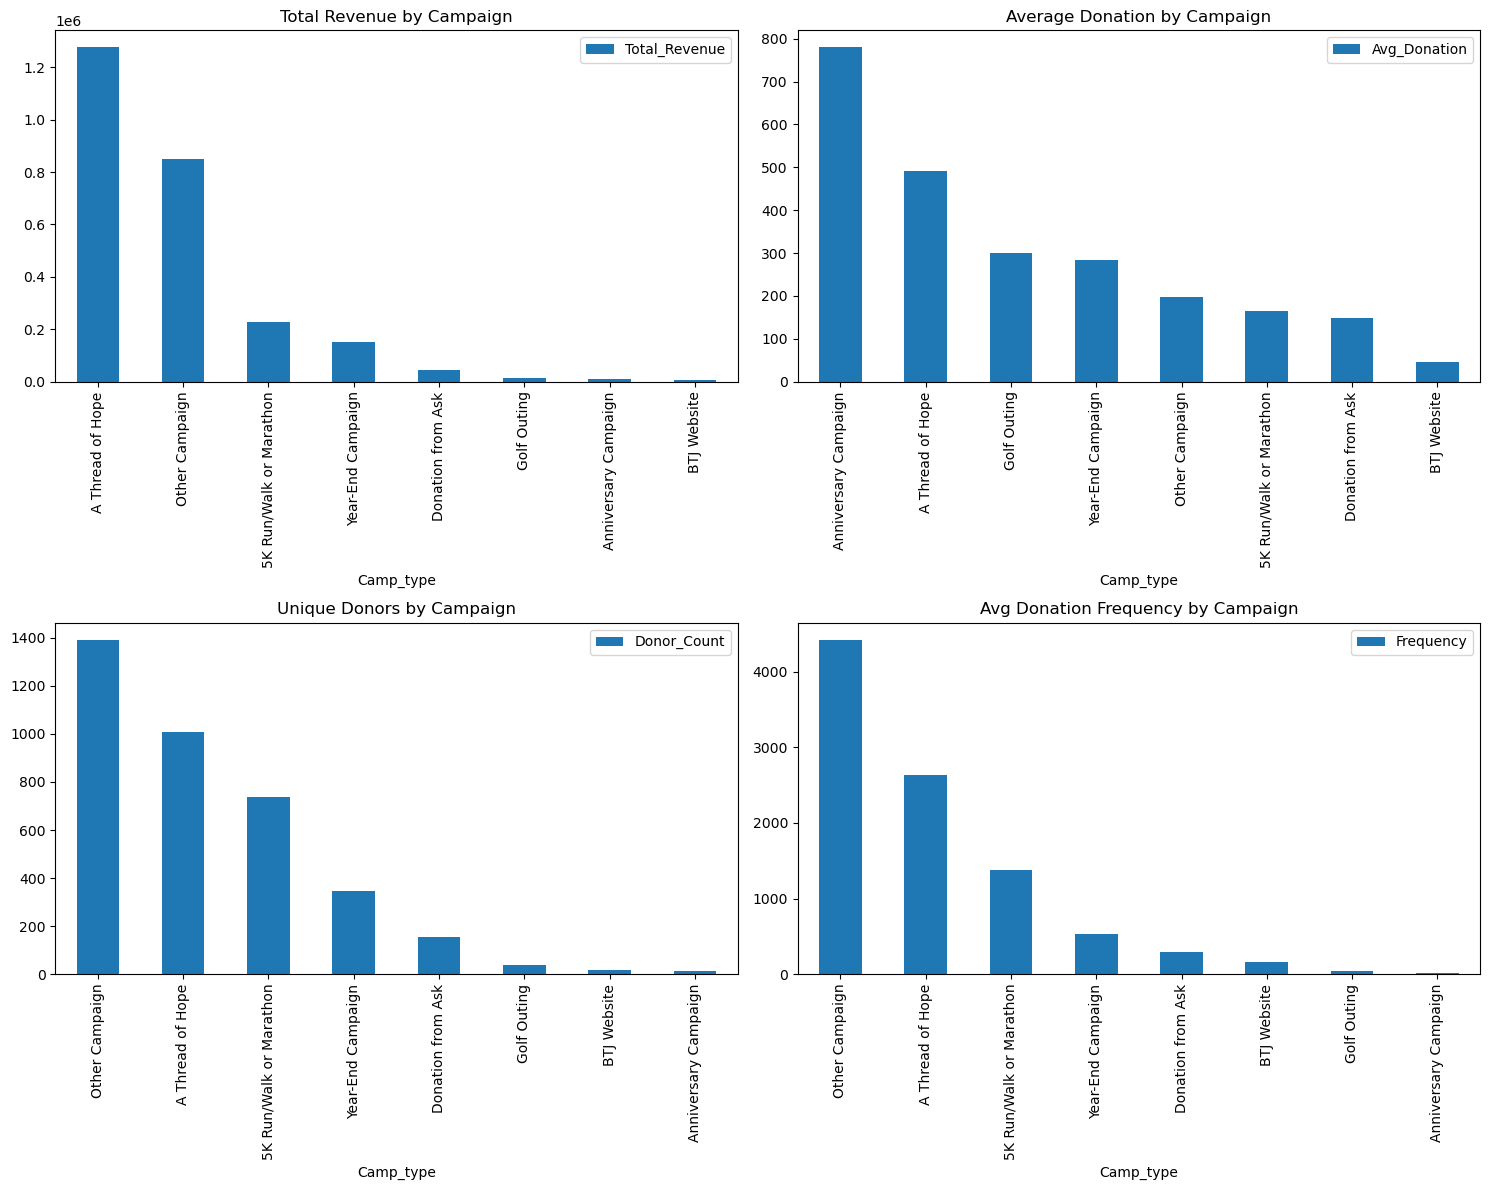

In [45]:
# Campaign performance metrics
campaign_stats = transactions_sf.groupby('Camp_type').agg(
    Total_Revenue=('Revenue Amount', 'sum'),
    Avg_Donation=('Revenue Amount', 'mean'),
    Donor_Count=('Account Number', 'nunique'),
    Frequency=('Account Number', 'count')
).sort_values('Total_Revenue', ascending=False)

print("Top Performing Campaigns:")
print(campaign_stats.head(10))

# Visualization: Campaign Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
campaign_stats.nlargest(10, 'Total_Revenue').plot(kind='bar', y='Total_Revenue', ax=axes[0,0], title='Total Revenue by Campaign')
campaign_stats.nlargest(10, 'Avg_Donation').plot(kind='bar', y='Avg_Donation', ax=axes[0,1], title='Average Donation by Campaign')
campaign_stats.nlargest(10, 'Donor_Count').plot(kind='bar', y='Donor_Count', ax=axes[1,0], title='Unique Donors by Campaign')
campaign_stats.nlargest(10, 'Frequency').plot(kind='bar', y='Frequency', ax=axes[1,1], title='Avg Donation Frequency by Campaign')
plt.tight_layout()
plt.show()

#### How can we bridge the profit and engagement gap between ToH and YEC to end the last quarter of the year strong?  

To bridge this gap, YEC should adopt ToH’s winning strategies: outsource labor and collaborate with external partners (like businesses or universities) to expand reach, strengthen donor retention through loyalty programs and targeted asks and leverage data-driven outreach to replicate ToH’s high-value donor base. Additionally, YEC should launch earlier in Q4 to avoid holiday giving fatigue and align with seasonal generosity. By implementing these proven tactics, YEC can transform from an underperformer into a high-impact campaign, closing the revenue gap and finishing the year strong.

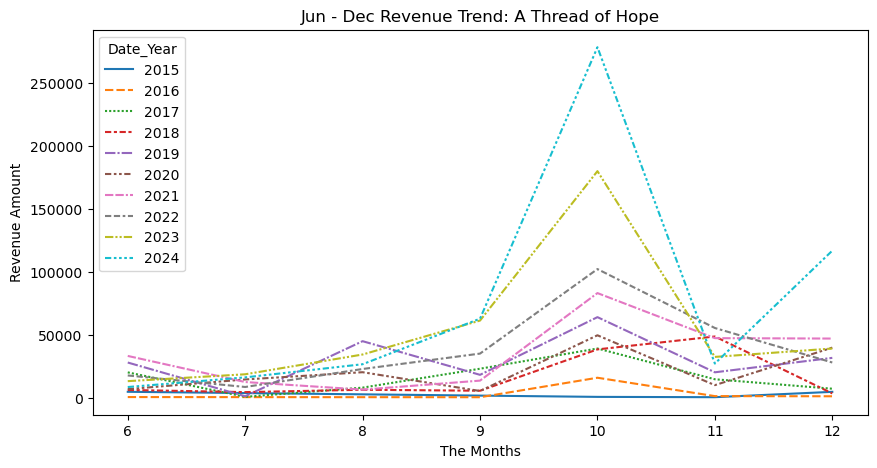

In [ ]:
high_campaign = 'A Thread of Hope'
low_campaign = 'Year-End Campaign'

for campaign in [high_campaign]:
    campaign_data = transactions_sf[transactions_sf['Camp_type'] == campaign]
    campaign_data = transactions_sf[transactions_sf['Date_Month'] > 5]
    monthly = campaign_data.groupby(['Date_Year', 'Date_Month'])['Revenue Amount'].sum().unstack()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly.T)
    plt.title(f'Jun - Dec Revenue Trend: {campaign}')
    plt.ylabel('Revenue Amount')
    plt.xlabel('The Months')
    plt.show()

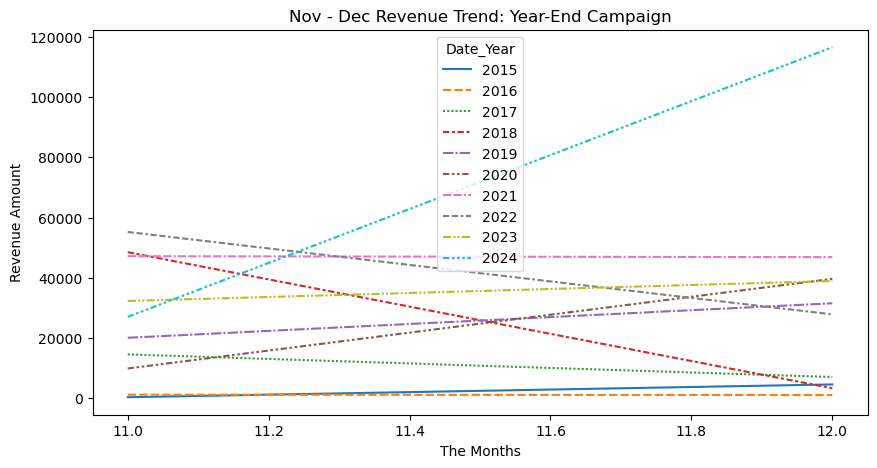

In [51]:
for campaign in [low_campaign]:
    campaign_data = transactions_sf[transactions_sf['Camp_type'] == campaign]
    campaign_data = transactions_sf[transactions_sf['Date_Month'] > 10]
    monthly = campaign_data.groupby(['Date_Year', 'Date_Month'])['Revenue Amount'].sum().unstack()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly.T)
    plt.title(f'Nov - Dec Revenue Trend: {campaign}')
    plt.ylabel('Revenue Amount')
    plt.xlabel('The Months')
    plt.show()

## Recommended Solutions 

To improve the performance of the Year-End Campaign, Sam’s Fan should adopt strategies proven effective by its most successful initiative, the Thread of Hope campaign, which consistently outperformed other campaigns due to its outsourced, collaborative model. Key actionable steps include:

1. Outsource Labor and Partner with External Organizations
    + Mirror the Thread of Hope approach by collaborating with established nonprofits or event specialists to expand reach and reduce internal resource strain.
   
2. Strengthen Ties with High School Philanthropy Programs
    + Engage student-led initiatives (e.g., service clubs, honor societies) to tap into youthful energy and community networks, similar to Thread of Hope’s partnerships with educational groups.

3. Leverage Greek Life Networks
    + Partner with sororities and fraternities for volunteer manpower and fundraising support, as their structured philanthropy programs align with Thread of Hope’s reliance on external groups.
   
4. Pursue Targeted Sponsorships
    + Health/Insurance Sector: Seek funding from foundations like Nationwide, Ohio Health, or Anthem Blue Cross, whose CSR goals align with Sam’s Fan’s mission.
    + Arts/Music Sector: Collaborate with organizations such as the Columbus Symphony or Shadowbox Live to co-host events, combining audiences and resources—a tactic Thread of Hope used effectively.

#### Why These Solutions?

The Thread of Hope campaign’s success demonstrates that outsourcing labor and building strategic external partnerships increase scalability, reduce overhead, and amplify impact. By applying these lessons to the Year-End Campaign, Sam’s Fan can replicate Thread of Hope’s high-performance outcomes while fostering sustainable community ties.